Dataset Overview:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose 

C:\Users\HP\AppData\Local\Temp\ipykernel_12716\483503668.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.median(), inplace=True)


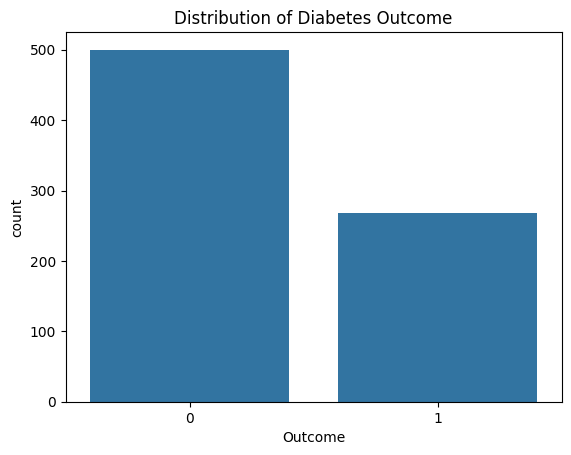

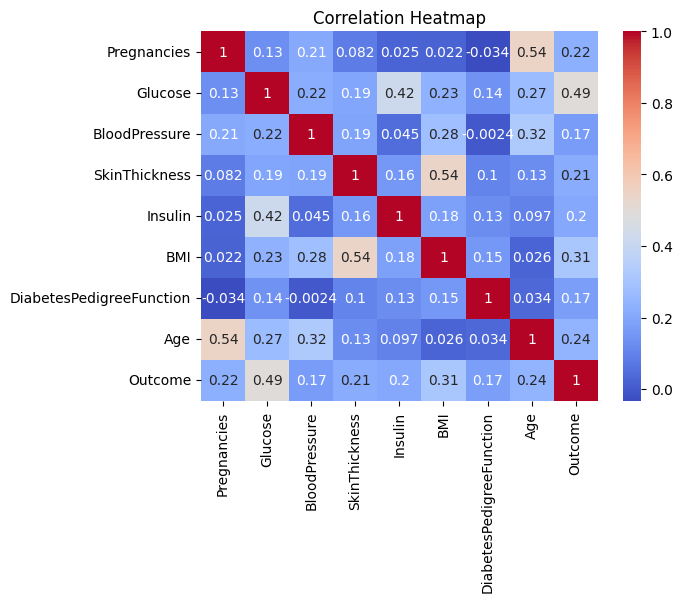

Accuracy: 0.7338
ROC AUC Score: 0.8341



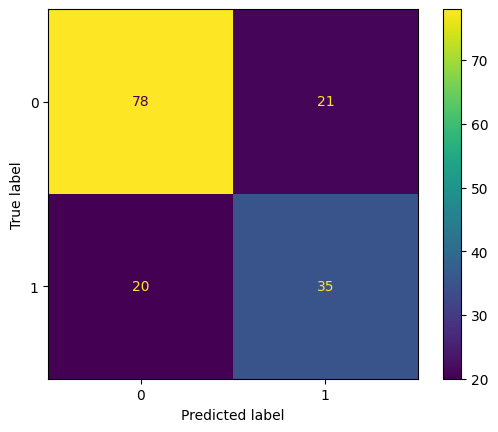

Feature Importances:
                    Feature  Importance
1                   Glucose    0.263453
5                       BMI    0.164118
7                       Age    0.134927
6  DiabetesPedigreeFunction    0.121819
4                   Insulin    0.089248
2             BloodPressure    0.084062
3             SkinThickness    0.072432
0               Pregnancies    0.069942


In [2]:
# =========================================
# Healthcare Diagnosis: Diabetes Prediction
# =========================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay

# 1️⃣ Load the dataset
file_path = r"D:\DS Projects\Pima Indians Diabetes Database\diabetes.csv"
df = pd.read_csv(file_path)
print("Dataset Overview:\n")
print(df.head(), "\n")
print(df.info(), "\n")
print(df.describe(), "\n")

# 2️⃣ Data Cleaning
cols_with_zeros = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, pd.NA)
df.fillna(df.median(), inplace=True)

# 3️⃣ Exploratory Data Analysis (EDA)
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Diabetes Outcome")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 4️⃣ Optional Feature Engineering (BMI categories)
# Create BMI_category but DO NOT include it directly in scaling
df['BMI_category'] = pd.cut(df['BMI'], bins=[0,18.5,24.9,29.9,100], 
                            labels=['Underweight','Normal','Overweight','Obese'])

# 5️⃣ Prepare Features and Target
# Use only numeric columns for model
X = df.drop(['Outcome','BMI_category'], axis=1)
y = df['Outcome']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# 7️⃣ Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1])
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}\n")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test_scaled, y_test)
plt.show()

# Feature Importance
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feat_imp_df)
